# Energy Spectrum Comparison

RAP energy spectra with penalty terms:
- (a) Repetition code [[3,1,3]] with stabilizer penalty
- (b) Bacon-Shor [[4,1,1,2]] with gauge penalty

In [ ]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.insert(0, os.path.dirname(os.getcwd()))
from qec_config import QECConfig, BaconShorConfig, PlotConfig

PlotConfig.apply()

# Parameters
EP_MHZ = 50
N_POINTS = 1001
OUTPUT_DIR = Path('../figs/main_figure')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Initialize
rep = QECConfig(n_points=N_POINTS)
bs = BaconShorConfig(n_points=N_POINTS)
Ep = rep.Ep_MHz_to_rad(EP_MHZ)

# Load/compute spectra
rep_E, rep_idx = rep.get_or_compute_spectrum(Ep=Ep)
bs_E, bs_idx = bs.get_or_compute_spectrum(Ep=Ep)

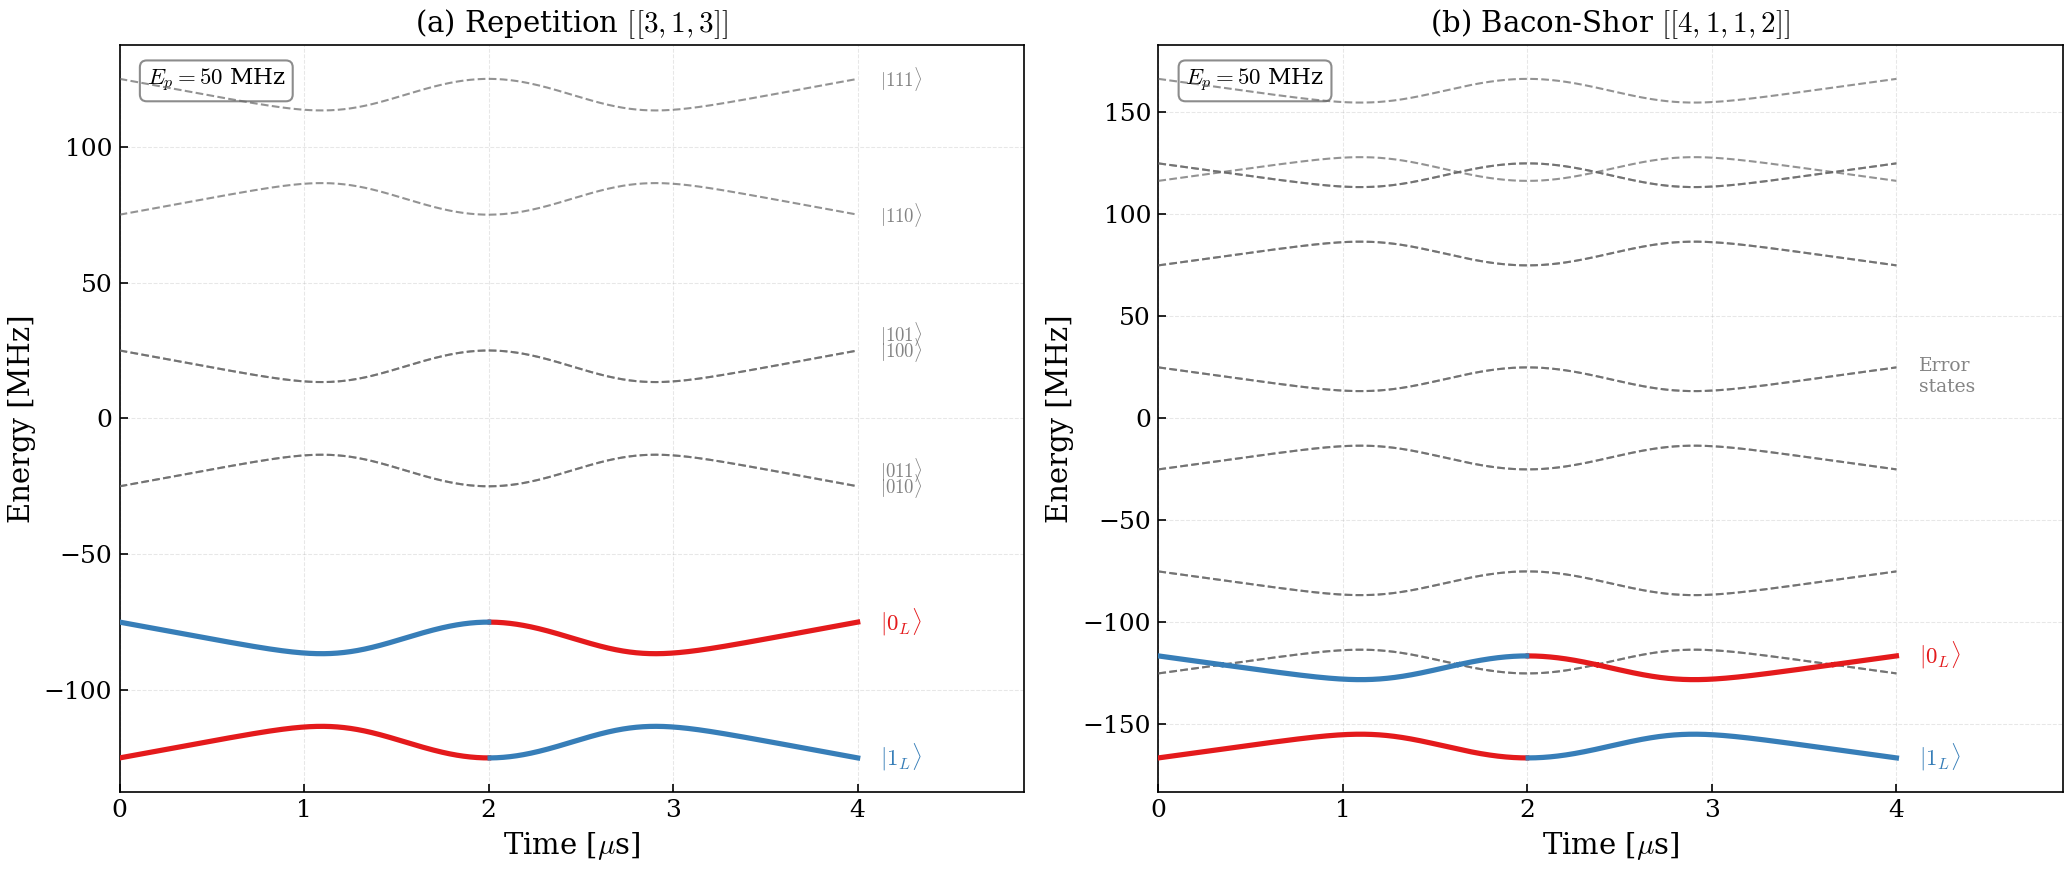

In [2]:
# Plotting helper
def plot_spectrum(ax, config, energies, idx_series, title, show_ylabel=True):
    """Plot full energy spectrum with state labels."""
    t = config.t_list * config.TO_TIME_UNITS
    C0, C1 = PlotConfig.COLORS_LOGICAL
    C_ERR = PlotConfig.COLOR_ERROR_DEFAULT
    
    # Logical states
    E0 = config.break_at_swaps(energies[0] * config.TO_FREQ_UNITS, idx_series[0])
    E1 = config.break_at_swaps(energies[1] * config.TO_FREQ_UNITS, idx_series[1])
    ax.plot(t, E0, color=C0, lw=2.5, zorder=10)
    ax.plot(t, E1, color=C1, lw=2.5, zorder=10)
    
    # Error states
    for i in range(2, config.dim):
        ax.plot(t, energies[i] * config.TO_FREQ_UNITS, 
                color=C_ERR, lw=1.0, ls='--', alpha=0.7, zorder=5)
    
    # Right-side labels
    x_off = 0.12
    ax.text(t[-1] + x_off, energies[0][-1] * config.TO_FREQ_UNITS, 
            r'$|0_L\rangle$', fontsize=11, va='center', color=C0, fontweight='bold')
    ax.text(t[-1] + x_off, energies[1][-1] * config.TO_FREQ_UNITS, 
            r'$|1_L\rangle$', fontsize=11, va='center', color=C1, fontweight='bold')
    
    # Error state labels - adjusted to avoid overlap
    err_finals = [(energies[i][-1] * config.TO_FREQ_UNITS, i) for i in range(2, config.dim)]
    err_finals.sort(key=lambda x: x[0])
    
    if config.dim <= 8:  # Few states - label each
        min_sep = 6
        pos = []
        for i, (e, _) in enumerate(err_finals):
            pos.append(e if i == 0 else max(e, pos[-1] + min_sep))
        for (e, idx), p in zip(err_finals, pos):
            label = format(idx, f'0{int(np.log2(config.dim))}b')
            ax.text(t[-1] + x_off, p, f'$|{label}\\rangle$', fontsize=9, 
                    va='center', color=C_ERR, alpha=0.8)
    else:  # Many states - group label
        mid = (err_finals[0][0] + err_finals[-1][0]) / 2
        ax.text(t[-1] + x_off, mid, 'Error\nstates', fontsize=9, 
                va='center', color=C_ERR, alpha=0.8)
    
    # Styling
    ax.set_xlabel(r'Time [$\mu$s]', fontsize=14)
    if show_ylabel:
        ax.set_ylabel('Energy [MHz]', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.tick_params(labelsize=12)
    ax.grid(True, alpha=0.3, ls='--')
    ax.set_xlim([0, t[-1] + 0.9])
    ax.text(0.03, 0.97, f'$E_p = {EP_MHZ}$ MHz', transform=ax.transAxes,
            fontsize=11, va='top', bbox=dict(boxstyle='round', fc='white', ec='gray', alpha=0.9))

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

plot_spectrum(ax1, rep, rep_E, rep_idx, r'(a) Repetition $[[3,1,3]]$', show_ylabel=True)
plot_spectrum(ax2, bs, bs_E, bs_idx, r'(b) Bacon-Shor $[[4,1,1,2]]$', show_ylabel=True)

plt.tight_layout()
plt.show()

In [3]:
# Save figure
fig.savefig(OUTPUT_DIR / 'energy_spectrum_comparison.pdf', bbox_inches='tight')
fig.savefig(OUTPUT_DIR / 'energy_spectrum_comparison.svg', bbox_inches='tight')
fig.savefig(OUTPUT_DIR / 'energy_spectrum_comparison.png', dpi=300, bbox_inches='tight')

# Save data
data = {'Ep_MHz': EP_MHZ, 't_rep_us': rep.t_list * rep.TO_TIME_UNITS, 
        't_bs_us': bs.t_list * bs.TO_TIME_UNITS}
for i in range(rep.dim):
    data[f'rep_E{i}_MHz'] = rep_E[i] * rep.TO_FREQ_UNITS
for i in range(bs.dim):
    data[f'bs_E{i}_MHz'] = bs_E[i] * bs.TO_FREQ_UNITS
data['rep_idx_0L'], data['rep_idx_1L'] = np.array(rep_idx[0]), np.array(rep_idx[1])
data['bs_idx_0L'], data['bs_idx_1L'] = np.array(bs_idx[0]), np.array(bs_idx[1])

np.savez_compressed(OUTPUT_DIR / 'plot_data.npz', **data)
print(f"Saved to {OUTPUT_DIR}")

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


Saved to ../figs/main_figure
